In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataDevClub/dataDevclub.csv", 
                 names=['emp_id', 'passport', 'fname', 'lname', 'gender', 'birthdate', 'nationality', 'hired', 'dept', 'postion', 'status', 'region'])

In [65]:
df.columns

Index(['emp_id', 'passport', 'fname', 'lname', 'gender', 'birthdate',
       'nationality', 'hired', 'dept', 'postion', 'status', 'region'],
      dtype='object')

In [66]:
df.head()

,emp_id,passport,fname,lname,gender,birthdate,nationality,hired,dept,postion,status,region
0,3,JUI65YBK7AF,Jada,Bender,0,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada
1,5,AZE20CSG4MU,Lillian,Reese,0,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada
2,23,NFH65BYM0VB,Armand,Horn,0,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia
3,29,CMK62UAD3VK,Rowan,Leonard,1,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia
4,33,EWD45RJW5YK,Carter,Velasquez,0,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC


## Add and Chage data into dataframe

### Tranform gender into "Male" or "Female"

In [67]:
arr = []
for gender in df['gender'].to_numpy():
  if gender == 0: arr.append('Male')
  else: arr.append('Female')
  
# Chang data 0,1 into Male, Female
df['gender'] = arr

In [68]:
df.head()

,emp_id,passport,fname,lname,gender,birthdate,nationality,hired,dept,postion,status,region
0,3,JUI65YBK7AF,Jada,Bender,Male,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada
1,5,AZE20CSG4MU,Lillian,Reese,Male,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada
2,23,NFH65BYM0VB,Armand,Horn,Male,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia
3,29,CMK62UAD3VK,Rowan,Leonard,Female,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia
4,33,EWD45RJW5YK,Carter,Velasquez,Male,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC


### Add age column

In [97]:
arr = []

for el in np.asarray(df['birthdate']):
  year_birth = int(el.split('-')[-1])
  arr.append(int(dt.now().year) - year_birth)

df['age'] = arr

In [98]:
df.head()

,emp_id,passport,fname,lname,gender,birthdate,nationality,hired,dept,postion,status,region,age
0,3,JUI65YBK7AF,Jada,Bender,Male,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada,59
1,5,AZE20CSG4MU,Lillian,Reese,Male,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada,40
2,23,NFH65BYM0VB,Armand,Horn,Male,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia,35
3,29,CMK62UAD3VK,Rowan,Leonard,Female,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia,48
4,33,EWD45RJW5YK,Carter,Velasquez,Male,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC,55


### Add hired year

In [100]:
arr = []

for el in np.asarray(df['hired']):
  year = int(el.split('-')[-1])
  arr.append(year)

df['hired_year'] = arr

In [101]:
df.head()

,emp_id,passport,fname,lname,gender,birthdate,nationality,hired,dept,postion,status,region,age,hired_year
0,3,JUI65YBK7AF,Jada,Bender,Male,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada,59,2001
1,5,AZE20CSG4MU,Lillian,Reese,Male,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada,40,2002
2,23,NFH65BYM0VB,Armand,Horn,Male,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia,35,2007
3,29,CMK62UAD3VK,Rowan,Leonard,Female,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia,48,2004
4,33,EWD45RJW5YK,Carter,Velasquez,Male,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC,55,2005


## Pie Chart: Gender

In [119]:
plt.rcParams["figure.figsize"] = (10, 5.5) # Config size

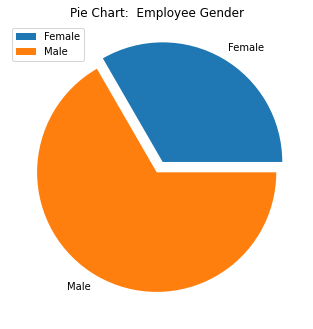

In [120]:
# Group data
dfGender = df[['emp_id', 'gender']]
plt.title('Pie Chart:  Employee Gender')
plt.pie(dfGender.groupby(['gender'])['emp_id'].count(), labels=['Female', 'Male'], explode = [0.1, 0])
plt.legend()
plt.show()

## Bar Chart: Nationality

In [144]:
plt.rcParams["figure.figsize"] = (10, 5) # Config size

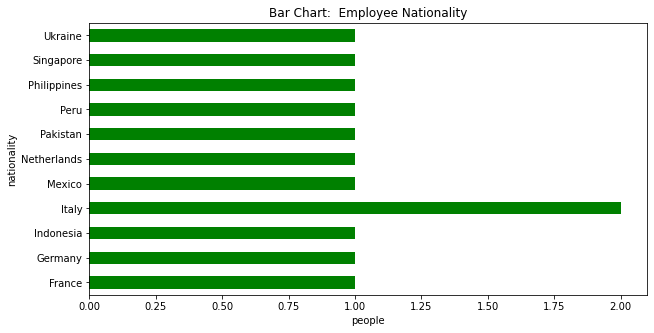

In [145]:
dfNationality = df[['emp_id', 'nationality']]
plt.title('Bar Chart:  Employee Nationality')
dfNationality.groupby(['nationality'])['emp_id'].count().plot.barh(color='green')
plt.xlabel('people')
plt.show()

## Bar Chart: Employee Region

In [147]:
plt.rcParams["figure.figsize"] = (10, 5) # Config size

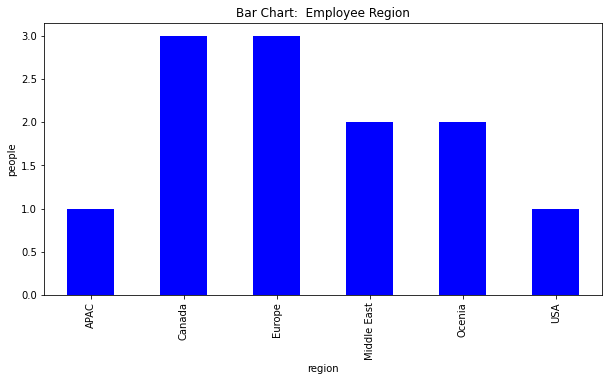

In [148]:
dfNationality = df[['emp_id', 'region']]
plt.title('Bar Chart:  Employee Region')
dfNationality.groupby(['region'])['emp_id'].count().plot.bar(color='blue')
plt.ylabel('people')
plt.show()

## Bar Char: Age average each of Employee deparment

In [146]:
plt.rcParams["figure.figsize"] = (10, 5) # Config size

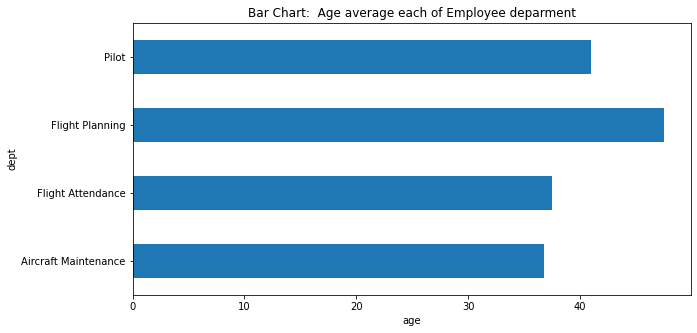

In [186]:
dfAge = df[['age', 'dept']]
dfAge.groupby(['dept'])['age'].mean().plot.barh()
plt.title('Bar Chart:  Age average each of Employee deparment')
plt.xlabel('age')
plt.show()